                          APP RATING PREDICTION


Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.


                                 Steps to perform:

1.Load the data file using pandas


In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [8]:
df=pd.read_csv("googleplaystore.csv")

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device



2.Check for null values in the data. Get the number of null values for each column.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [55]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


3.Drop records with nulls in any of the columns. 


In [175]:
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

4.1.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.



In [57]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [58]:
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    
    elif 'K'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else:return None

df.Size=df.Size.map(change)
df.Size.value_counts()

14000.0    165
12000.0    161
11000.0    159
15000.0    159
13000.0    157
          ... 
89000.0      9
84000.0      9
86000.0      8
90000.0      5
1000.0       4
Name: Size, Length: 181, dtype: int64

In [59]:
df['Size'].unique()

array([ 19000.,  14000.,   8700.,  25000.,   2800.,   5600.,  29000.,
        33000.,   3100.,  28000.,  12000.,  20000.,  21000.,  37000.,
         5500.,  17000.,  39000.,  31000.,   4200.,  23000.,   6000.,
         6100.,   4600.,   9200.,   5200.,  11000.,  24000.,     nan,
         9400.,  15000.,  10000.,   1200.,  26000.,   8000.,   7900.,
        56000.,  57000.,  35000.,  54000.,   3600.,   5700.,   8600.,
         2400.,  27000.,   2700.,   2500.,   7000.,  16000.,   3400.,
         8900.,   3900.,   2900.,  38000.,  32000.,   5400.,  18000.,
         1100.,   2200.,   4500.,   9800.,  52000.,   9000.,   6700.,
        30000.,   2600.,   7100.,  22000.,   6400.,   3200.,   8200.,
         4900.,   9500.,   5000.,   5900.,  13000.,  73000.,   6800.,
         3500.,   4000.,   2300.,   2100.,  42000.,   9100.,  55000.,
         7300.,   6500.,   1500.,   7500.,  51000.,  41000.,  48000.,
         8500.,  46000.,   8300.,   4300.,   4700.,   3300.,  40000.,
         7800.,   88


4.2.Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).


In [60]:
df.Reviews.dtype

dtype('O')

In [61]:
df['Reviews']=df.Reviews.replace('3.0M',3000000.0)

In [62]:
df['Reviews']=df['Reviews'].astype('int')

In [63]:
df.Reviews.dtype

dtype('int64')


4.3.Installs field is currently stored as string and has values like 1,000,000+. 


In [64]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)


4.3.1.Treat 1,000,000+ as 1,000,000


In [65]:
df['Installs']=df.Installs.str.replace("+","")
df.Installs=df.Installs.str.replace('Free','0')

In [66]:
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '100', '500', '10', '5',
       '50', '1'], dtype=object)


4.3.2.remove ‘+’, ‘,’ from the field, convert it to integer


In [67]:
df['Installs']=df.Installs.str.replace(",","")

In [68]:
df.Installs=pd.to_numeric(df.Installs)

In [69]:
df.Installs.dtype

dtype('int64')


4.4.Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.


In [70]:
df.Price=df.Price.str.replace('$','')
df.Price=df.Price.str.replace('Everyone','0')

In [71]:
df.Price=pd.to_numeric(df.Price)

In [74]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [77]:
df.Price.dtype

dtype('float64')


5.Sanity checks:

5.1.Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.


In [78]:
df=df[(df.Rating>=1)&(df.Rating<=5)]

In [79]:
df.Rating.value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [80]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])


5.2.Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.


In [83]:
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64

In [87]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [88]:
len(df.Installs)

9360

In [89]:
len(df.Rating)

9360


5.3.For free apps (type = “Free”), the price should not be >0. Drop any such rows.


In [91]:
df.Type.value_counts()


Free    8715
Paid     645
Name: Type, dtype: int64

In [92]:
index_free_price_0=df.index[((df.Type=='Free')&(df.Price>0))]
if len(index_free_price_0)>0:
    print("Dropping such values",index_free_price_0)
    df.drop(index_free_price0,axis=0,inplace=True)
else:
    print("There has no apps price>0")

There has no apps price>0



5. Performing univariate analysis: 

5.1.Boxplot for Price

5.1.Q.Are there any outliers? Think about the price of usual apps on Play Store.


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

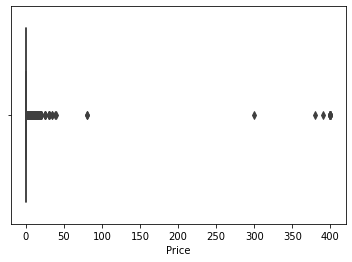

In [96]:
sns.boxplot(df['Price'])


5.1.ANS.most of the price values are located in the range of 50. greater than 100 may be cansidered as outliers


In [98]:
import matplotlib.pyplot as plt

In [99]:
import statistics as stc


standard deviation of price


In [103]:
p_std=stc.stdev(df.Price)
print(p_std)

15.82164024735431



mean of price


In [104]:
p_mean=stc.mean(df.Price)
print(p_mean)

0.9612788461538462



price upper limit


In [105]:
price_up_lim=p_mean+3*p_std
print(price_up_lim)

48.426199588216775


In [106]:
len(df[df.Price>price_up_lim])

17


price lower limit


In [107]:
price_low_lim=p_mean-3*p_std
print(price_low_lim)

-46.503641895909084


In [108]:
len(df[df.Price<price_low_lim])

0


here i got 17 outliers



5.2.Boxplot for Reviews

5.2.Q.Are there any apps with very high number of reviews? Do the values seem right?

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Reviews'>

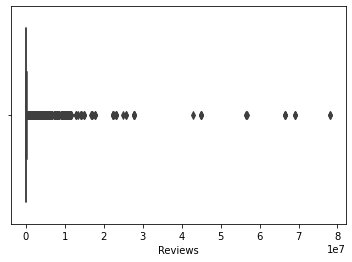

In [109]:
sns.boxplot(df['Reviews'])


5.2.ANS.here we can find out some outliers.



standard deviation reviews


In [110]:
review_std=stc.stdev(df.Reviews)
print(review_std)

3145023.255620224



mean of review


In [112]:
review_mean=stc.mean(df.Reviews)
print(review_mean)

514376.7052350427



review uper limit


In [113]:
review_up_lim=review_mean+3*review_std
print(review_up_lim)

9949446.472095715


In [115]:
len(df[df.Reviews>review_up_lim])

92


review lower limt


In [121]:
review_low_lim=review_mean-3*review_std
print(review_low_lim)

-8920693.061625628


In [119]:
len(df[df.Reviews<review_low_lim])

0


review column has 60 upper outlier.

removeing outlier


In [122]:
df.drop(df.index[(df.Reviews>review_up_lim)],inplace=True)

In [123]:
len(df[df.Reviews>review_up_lim])

0

5.3.Histogram for Rating

5.3.Q.How are the ratings distributed? Is it more toward higher ratings?

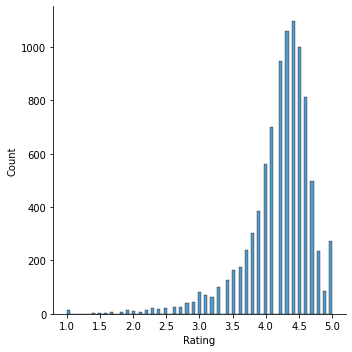

In [124]:
sns.displot(df.Rating)

5.3.ans.this graph showing that 4.0 to 4.7 high variation(peak).it is a left skew plot.


define mean and standard deviation


In [125]:
rating_mean=np.mean(df.Rating)
rating_mean

4.189846784635309

In [126]:
rating_std=np.std(df.Rating)
rating_std

0.5170834870588434


define uper and lower outliers


In [127]:
rating_up_lim=rating_mean+3*rating_std
print(rating_up_lim)

5.741097245811839


In [128]:
len(df[df.Rating>rating_up_lim])

0

In [130]:
rating_low_lim=rating_mean-3*rating_std
rating_low_lim

2.6385963234587786

In [131]:
len(df[df.Rating<rating_low_lim])

175


removing outliers


In [132]:
df.drop(df.index[df.Rating<rating_low_lim],inplace=True)
len(df[df.Rating<rating_low_lim])

0


5.4.Histogram for Size


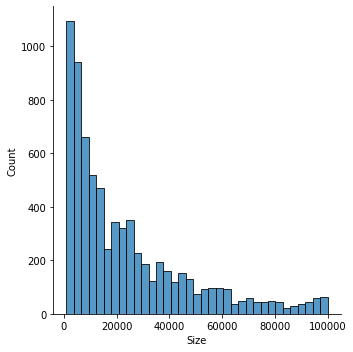

In [136]:
sns.displot(df.Size)

<AxesSubplot:xlabel='Size', ylabel='Count'>

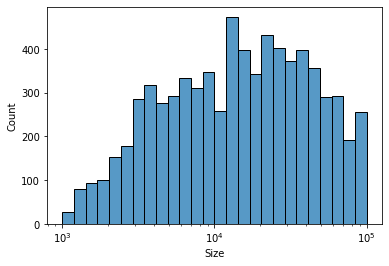

In [134]:
sns.histplot(x='Size',data=df,log_scale=True)

In [137]:
size_mean=stc.mean(df.Size)
print(size_mean)

nan


In [138]:
size_std=stc.stdev(df.Size)
print(size_std)

nan



6.Outlier treatment: 

6.1.Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

6.1.1.Check out the records with very high price



In [139]:
df[df.Price>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,NaN,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [140]:
a=len(df[df.Price>=200])
print(a,"apps are>200 ")

15 apps are>200 



6.1.2.Drop these as most seem to be junk apps


In [141]:
df.drop(df.index[df.Price>=200],inplace=True)
len(df.Price)


9078


5.2.Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.


In [142]:
df.drop(df.index[df.Reviews>2000000],inplace=True)
len(df.index)

8717


6.3.Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

6.3.1Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99


In [143]:
installs_10_perc=np.percentile(df.Installs,10)
print(installs_10_perc)

1000.0


In [144]:
installs_25_perc=np.percentile(df.Installs,25)
installs_25_perc

10000.0

In [145]:
installs_50_perc=np.percentile(df.Installs,50)
installs_50_perc

500000.0

In [75]:
installs_75_perc=np.percentile(df.Installs,70)
installs_50_perc

500000.0

In [146]:
installs_90_perc=np.percentile(df.Installs,90)
installs_90_perc

10000000.0

In [147]:
installs_95_perc=np.percentile(df.Installs,95)
installs_95_perc

10000000.0

In [148]:
installs_99_perc=np.percentile(df.Installs,99)
installs_99_perc

100000000.0


7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.




7.1.Make scatter plot/joinplot for Rating vs. Price



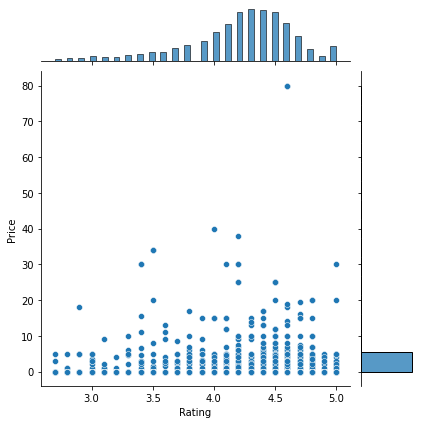

In [150]:
joint_ch=sns.jointplot(data=df,x='Rating',y='Price')


7.1.1.ans.What pattern do you observe? Does rating increase with price?


i observed that the rating and price are not in a good relationship.
price has negatively impacted on rating or seems like price has limited impact on rating.



7.2.Make scatter plot/joinplot for Rating vs. Size


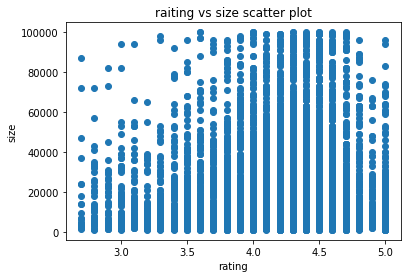

In [151]:
x=(df['Rating'])
y=(df['Size'])
plt.scatter(x,y)
plt.xlabel('rating')
plt.ylabel('size')
plt.title('raiting vs size scatter plot')
plt.show()

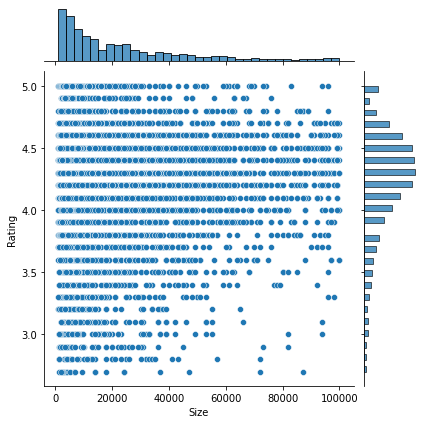

In [152]:
sns.jointplot(data=df,x='Size',y='Rating')


7.2.1. Are heavier apps rated better?

this plot showing us that most of apps raited between (3.5 to 5.0) almost data distributed evenly.
but relationship of this two variable unconvinced.


Make scatter plot/joinplot for Rating vs. Reviews


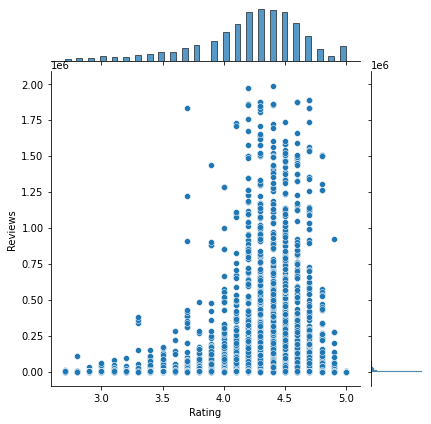

In [153]:
sns.jointplot(data=df,x='Rating',y='Reviews')


7.3.1.Does more review mean a better rating always?

this plot shown some relation between rating and review.this is left skew plot.high rating having high reviews.



7.4.Make boxplot for Rating vs. Content Rating


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

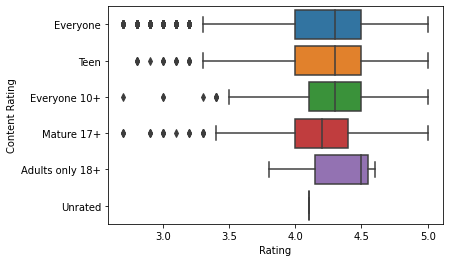

In [154]:
sns.boxplot(data=df,x='Rating',y='Content Rating')


7.4.1.Is there any difference in the ratings? Are some types liked better?

Adult only 18+ has slightly higher rating. others content rating are seems as same.


7.5.Make boxplot for Ratings vs. Category


<AxesSubplot:xlabel='Rating', ylabel='Category'>

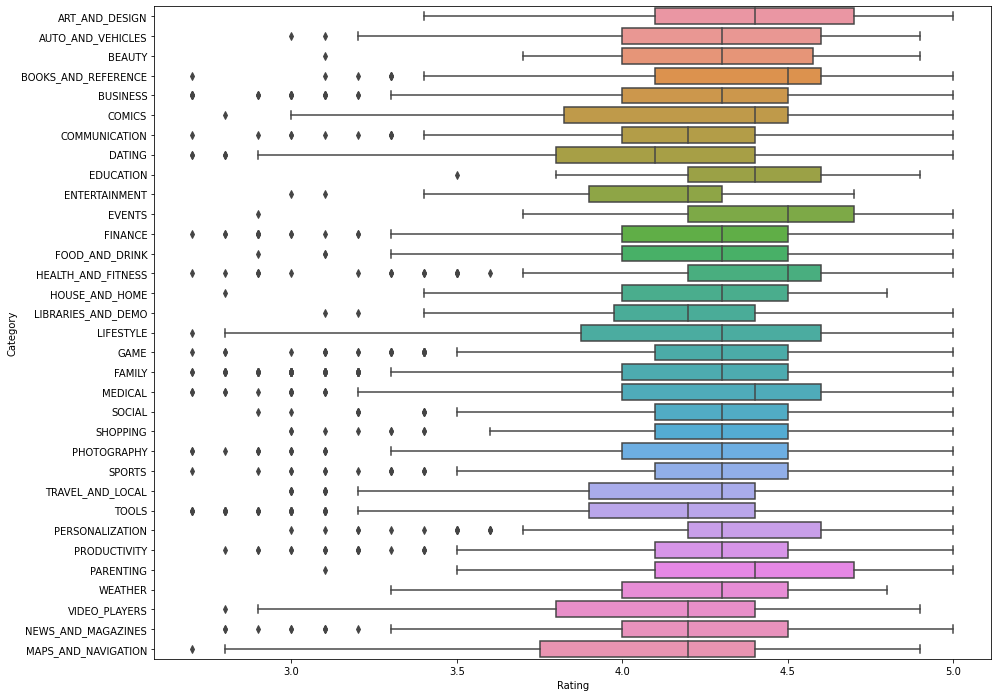

In [155]:
dim_box=(15,12)
plt.subplots(figsize=dim_box)
sns.boxplot(data=df,x='Rating',y='Category')
        

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

     8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

8.1.Reviews and Install have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.
Apply log transformation (np.log1p) to Reviews and Installs.


In [ ]:
mod_1=df.copy()
mod_1.Reviews=mod_1.Reviews.apply(np.log1p)
mod_1.Installs=mod_1.Installs.apply(np.log1p)



8.2.Drop columns App, Last Updated, Current Ver, and Android Ver. 
These variables are not useful for our task.


In [177]:
mod_1.drop(columns=['App','Last Updated','Current Ver','Android Ver'],inplace=True)

In [178]:
mod_1.shape

(7069, 9)


8.3.Get dummy columns for Category, Genres, and Content Rating. 
This needs to be done as the models do not understand categorical data, 
and all data should be numeric. Dummy encoding is one way to convert character-
fields to numeric. Name of dataframe should be inp2.


In [179]:
inp2=pd.get_dummies(mod_1)

In [180]:
inp2.shape

(7069, 158)


9. Train test split  and apply 70-30 split. 
Name the new dataframes df_train and df_test.


In [181]:
data=inp2.drop(columns='Rating')
data.shape

(7069, 157)

In [182]:
target=pd.DataFrame(inp2.Rating)
target.shape

(7069, 1)


10. Separate the dataframes into X_train, y_train, X_test, and y_test.


In [183]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.30,random_state=32)
print("x_train =",x_train.shape)
print('x_test =',x_test.shape)
print("y_train =",y_train.shape)
print('y_test =',y_test.shape)

x_train = (4948, 157)
x_test = (2121, 157)
y_train = (4948, 1)
y_test = (2121, 1)



11 . Model building
Use linear regression as the technique
Report the R2 on the train set


In [184]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [185]:
train_pred=regression.predict(x_train)
print('r2 value of train set is',r2_score(y_train,train_pred))

r2 value of train set is 0.19371992182920217



12. Make predictions on test set and report R2.


In [186]:
test_pred=regression.predict(x_test)
print('r2 value of train set is',r2_score(y_test,test_pred))

r2 value of train set is 0.14603814020909311
